In [3]:
import pandas as pd

# Memuat dataset
df = pd.read_csv('ratings.csv')

df.head()

,Game Name,Developer,Genre,Rating
0,Candy Crush Saga,King,Puzzle,4.6
1,Clash of Clans,Supercell,Strategy,4.5
2,Among Us,InnerSloth,Party,4.4
3,Pokémon GO,Niantic,Augmented Reality,4.3
4,PUBG Mobile,Tencent Games,Battle Royale,4.2


In [4]:
# Menghapus baris dengan missing values
df.dropna(inplace=True)
print("Jumlah missing values setelah penghapusan:")
print(df.isnull().sum())

# Mengonversi kolom kategori menjadi tipe data numerik menggunakan One-Hot Encoding
df = pd.get_dummies(df, columns=['Genre', 'Developer'])

print("Dataset setelah One-Hot Encoding:")
print(df.head())


Jumlah missing values setelah penghapusan:
Game Name    0
Developer    0
Genre        0
Rating       0
dtype: int64
Dataset setelah One-Hot Encoding:
          Game Name  Rating  Genre_Action  Genre_Action RPG  Genre_Adventure  \
0  Candy Crush Saga     4.6         False             False            False   
1    Clash of Clans     4.5         False             False            False   
2          Among Us     4.4         False             False            False   
3        Pokémon GO     4.3         False             False            False   
4       PUBG Mobile     4.2         False             False            False   

   Genre_Arcade  Genre_Augmented Reality  Genre_Battle Royale  Genre_Card  \
0         False                    False                False       False   
1         False                    False                False       False   
2         False                    False                False       False   
3         False                     True                False

In [5]:
# Memisahkan fitur dan target
X = df.drop(columns=['Rating', 'Game Name'])
y = df['Rating']

print("Fitur (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())


Fitur (X):
   Genre_Action  Genre_Action RPG  Genre_Adventure  Genre_Arcade  \
0         False             False            False         False   
1         False             False            False         False   
2         False             False            False         False   
3         False             False            False         False   
4         False             False            False         False   

   Genre_Augmented Reality  Genre_Battle Royale  Genre_Card  Genre_Casual  \
0                    False                False       False         False   
1                    False                False       False         False   
2                    False                False       False         False   
3                     True                False       False         False   
4                    False                 True       False         False   

   Genre_Clicker  Genre_Endless Runner  ...  Developer_Supercell  \
0          False                 False  ...      

In [8]:
from sklearn.model_selection import train_test_split

# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran data training dan testing:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")


Ukuran data training dan testing:
X_train: (80, 105)
X_test: (21, 105)
y_train: (80,)
y_test: (21,)


In [9]:
from sklearn.linear_model import LinearRegression

# Melatih model Regresi Linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Model Regresi Linear telah dilatih.")


Model Regresi Linear telah dilatih.


In [10]:
# Memprediksi
y_pred_lr = lr_model.predict(X_test)

print("Prediksi menggunakan model Regresi Linear:")
print(y_pred_lr)


Prediksi menggunakan model Regresi Linear:
[ 5.00615724e+10  8.31387156e+11  3.31895645e+11  4.34803391e+00
  3.31895645e+11  3.31895645e+11  3.39740413e+11 -7.84476747e+09
 -2.74825759e+11  4.49976730e+00  4.39905930e+00  4.17669296e+00
  3.31895645e+11  4.49942780e+00  1.36037011e+11  2.32583507e+11
 -1.62742775e+11 -1.62742775e+11  4.39869308e+00 -3.39740413e+11
 -1.62742775e+11]


In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluasi model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Regresi Linear - MSE: {mse_lr}, R2: {r2_lr}")


Regresi Linear - MSE: 7.584877446167036e+22, R2: -1.946991242002131e+24


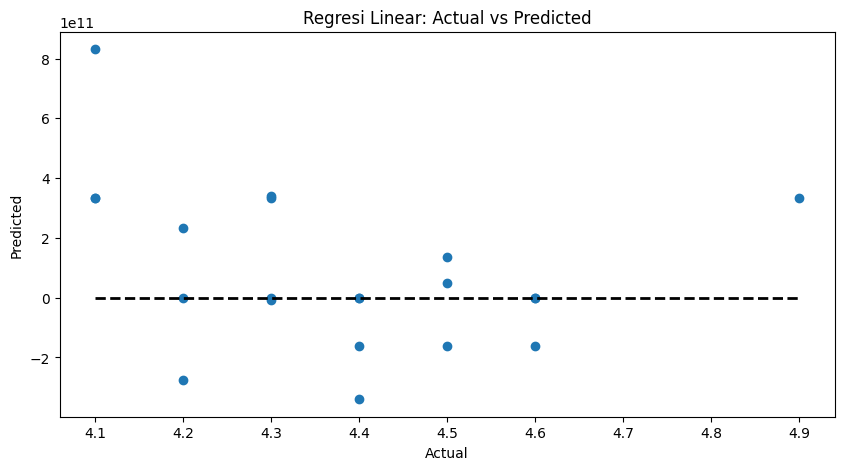

In [12]:
import matplotlib.pyplot as plt

# Visualisasi hasil
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Regresi Linear: Actual vs Predicted')
plt.show()


In [13]:
print("Random Forest")

Random Forest


In [14]:
import pandas as pd

# Memuat dataset
df = pd.read_csv('ratings.csv')

# Menampilkan beberapa baris pertama
print("Dataset yang dimuat:")
print(df.head())


Dataset yang dimuat:
          Game Name      Developer              Genre  Rating
0  Candy Crush Saga           King             Puzzle     4.6
1    Clash of Clans      Supercell           Strategy     4.5
2          Among Us     InnerSloth              Party     4.4
3        Pokémon GO        Niantic  Augmented Reality     4.3
4       PUBG Mobile  Tencent Games      Battle Royale     4.2


In [15]:
# Menghapus baris dengan missing values
df.dropna(inplace=True)
print("Jumlah missing values setelah penghapusan:")
print(df.isnull().sum())

# Mengonversi kolom kategori menjadi tipe data numerik menggunakan One-Hot Encoding
df = pd.get_dummies(df, columns=['Genre', 'Developer'])

print("Dataset setelah One-Hot Encoding:")
print(df.head())


Jumlah missing values setelah penghapusan:
Game Name    0
Developer    0
Genre        0
Rating       0
dtype: int64
Dataset setelah One-Hot Encoding:
          Game Name  Rating  Genre_Action  Genre_Action RPG  Genre_Adventure  \
0  Candy Crush Saga     4.6         False             False            False   
1    Clash of Clans     4.5         False             False            False   
2          Among Us     4.4         False             False            False   
3        Pokémon GO     4.3         False             False            False   
4       PUBG Mobile     4.2         False             False            False   

   Genre_Arcade  Genre_Augmented Reality  Genre_Battle Royale  Genre_Card  \
0         False                    False                False       False   
1         False                    False                False       False   
2         False                    False                False       False   
3         False                     True                False

In [16]:
# Memisahkan fitur dan target
X = df.drop(columns=['Rating', 'Game Name'])
y = df['Rating']

print("Fitur (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())


Fitur (X):
   Genre_Action  Genre_Action RPG  Genre_Adventure  Genre_Arcade  \
0         False             False            False         False   
1         False             False            False         False   
2         False             False            False         False   
3         False             False            False         False   
4         False             False            False         False   

   Genre_Augmented Reality  Genre_Battle Royale  Genre_Card  Genre_Casual  \
0                    False                False       False         False   
1                    False                False       False         False   
2                    False                False       False         False   
3                     True                False       False         False   
4                    False                 True       False         False   

   Genre_Clicker  Genre_Endless Runner  ...  Developer_Supercell  \
0          False                 False  ...      

In [17]:
from sklearn.model_selection import train_test_split

# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran data training dan testing:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")


Ukuran data training dan testing:
X_train: (80, 105)
X_test: (21, 105)
y_train: (80,)
y_test: (21,)


In [18]:
from sklearn.ensemble import RandomForestRegressor

# Melatih model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Model Random Forest telah dilatih.")


Model Random Forest telah dilatih.


In [19]:
# Memprediksi
y_pred_rf = rf_model.predict(X_test)

print("Prediksi menggunakan model Random Forest:")
print(y_pred_rf)


Prediksi menggunakan model Random Forest:
[4.369      4.356      4.331      4.415      4.35893333 4.35893333
 4.36793333 4.37       4.416      4.479      4.428      4.25
 4.331      4.468      4.284      4.315      4.448      4.393
 4.393      4.385      4.393     ]


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluasi model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")


Random Forest - MSE: 0.037381613333333265, R2: 0.04043705005820941


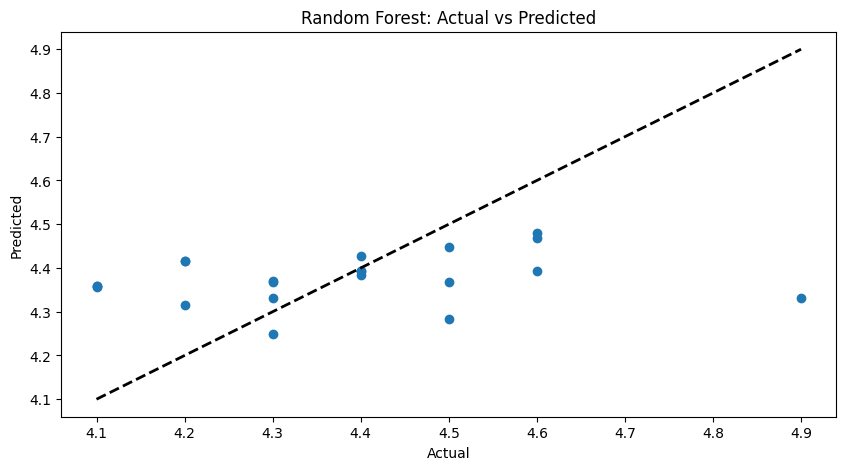

In [21]:
import matplotlib.pyplot as plt

# Visualisasi hasil
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')
plt.show()


In [22]:
# Membuat DataFrame untuk hasil
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MSE': [mse_lr, mse_rf],
    'R2': [r2_lr, r2_rf]
})

# Menampilkan hasil
print(results)


               Model           MSE            R2
0  Linear Regression  7.584877e+22 -1.946991e+24
1      Random Forest  3.738161e-02  4.043705e-02


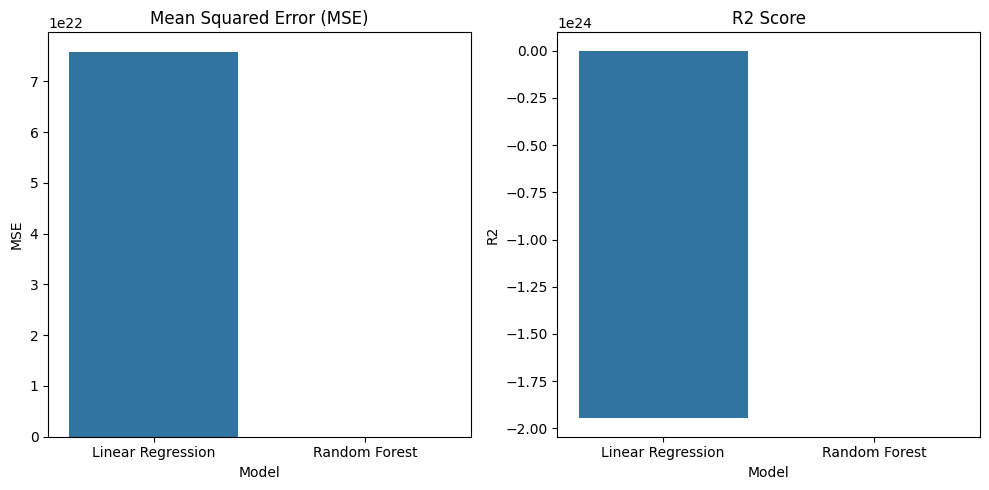

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi perbandingan hasil
plt.figure(figsize=(10, 5))

# Plot MSE
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=results)
plt.title('Mean Squared Error (MSE)')

# Plot R2
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R2', data=results)
plt.title('R2 Score')

plt.tight_layout()
plt.show()
